In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from scipy import stats
import numpy as np

In [2]:
dataFile = './data/data.csv'
df = pd.read_csv(dataFile)
df = df.dropna()
df = df.drop(columns=['hash', 'link', 'ticker'])
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].reset_index() #remove outliers

In [25]:
deltaT = []
deltaIncrease = []
dayOfWeek = []
hourOfDayPublished = []
classification = []
for index, row in df.iterrows():
    dT = (row['highTime']-row['pubTime'])/60.0
    deltaT.append(dT)
    date = datetime.datetime.utcfromtimestamp(row['pubTime'] - 14400) #times were stored as EST/EDT
    dayOfWeek.append((date.weekday()+1)%7) #make sunday start at 0. the python datetime package starts monday as 0
    hourOfDayPublished.append(date.hour)
    dI = row['high']/row['price']
    deltaIncrease.append(dI)
    if dI > 1.00 and dT > 5:
        classification.append(1)
    else:
        classification.append(0)
deltaT = pd.DataFrame(deltaT, columns=['deltaT'])
deltaIncrease = pd.DataFrame(deltaIncrease, columns=['deltaIncrease'])
dayOfWeek = pd.DataFrame(dayOfWeek, columns=['dayOfWeek'])
hourOfDayPublished = pd.DataFrame(hourOfDayPublished, columns=['hourPublished'])
classification = pd.DataFrame(classification, columns=['good/bad'])
data = pd.concat([df.drop(columns=['pubTime','highTime', 'index']), deltaT, deltaIncrease,dayOfWeek, hourOfDayPublished, classification], axis=1)
#data = data[data['price'] < 50]
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].reset_index() #re

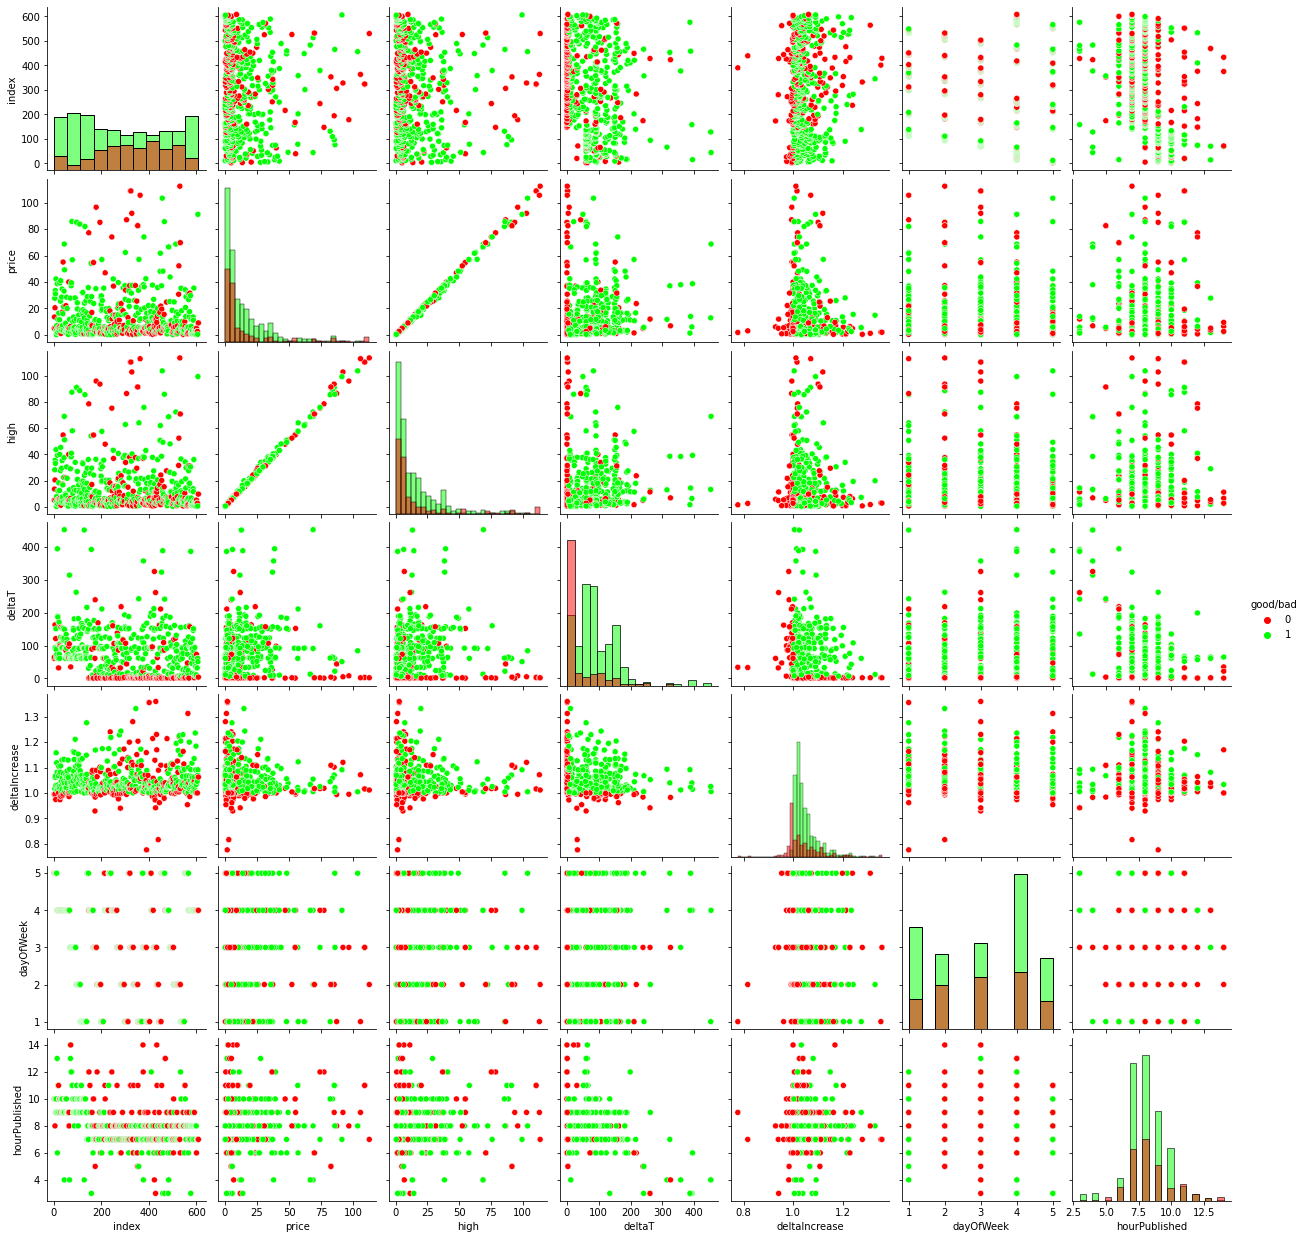

In [26]:
g = sns.pairplot(data, palette=sns.color_palette(["#FF0000", "#00FF00"]), hue='good/bad', diag_kind="hist")
g.savefig('output.png')


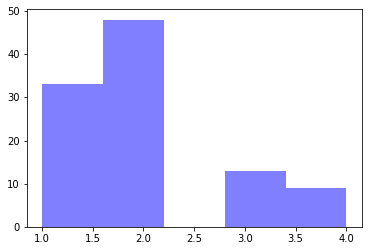

In [24]:
removeGarbage = []
for changeInTime in data['deltaT'].tolist():
    if float(changeInTime) > 0 and float(changeInTime) < 5: # was 1000 but dropped down to 200 with 9 buckets instead of 20
        removeGarbage.append(float(changeInTime))
num_bins = 5
n, bins, patches = plt.hist(removeGarbage, num_bins, facecolor="blue", alpha=.5)
plt.savefig("histogram3.png")
plt.show()


1.0587817470460834
0.9683767180593609


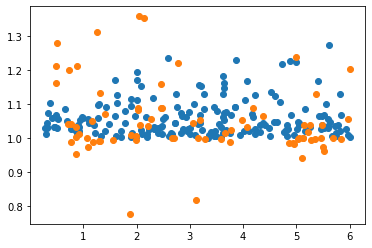

In [20]:
price = data['price'].to_list()
deltaIncrease = data['deltaIncrease'].to_list()
label = data['good/bad'].to_list()
priceGood = []
deltaIncreaseGood = []
priceBad = []
deltaIncreaseBad = []
for i in range(len(label)):
    if 1.5 < price[i] > 6:
        continue
    if label[i] == 1:
        priceGood.append(price[i])
        deltaIncreaseGood.append(deltaIncrease[i])
    else:
        priceBad.append(price[i])
        deltaIncreaseBad.append(deltaIncrease[i])
        
print(sum(deltaIncreaseGood)/len(deltaIncreaseGood))
print(sum([i for i in deltaIncreaseBad if i < 1 ])/len([i for i in deltaIncreaseBad if i < 1 ]))
plt.scatter(priceGood, deltaIncreaseGood)

plt.scatter(priceBad, deltaIncreaseBad)

plt.savefig("between1.5and6.png")
plt.show()

